In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

Buat list Python

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


Buat objek np.ndarray dan pd.Series yang sesuai dengan x dan x_with_nan

In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


## Measures of Central Tendency

Mean

In [4]:
mean_ = sum(x) / len(x)
mean_

8.7

Dapat juga menerapkan fungsi statistic built-in Python

In [5]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [6]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


Jika menggunakan NumPY, dapat digunakan np.mean()

In [7]:
mean_ = np.mean(y)
mean_

8.7

Pada contoh diatas mean() adalah sebuah fungsi, tapi kita juga bisa menggunakan method .mean():

In [8]:
mean_ = y.mean()
mean_

8.7

Fungsi mean() dan method .mean() dari NumPy mengembalikan has yang sama seperti statistic.mean()

In [9]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


Untuk mengabaikan nilai nan dapat menggunakan np.nanmean()

In [10]:
np.nanmean(y_with_nan)

8.7

pd.Series object juga mempunyai method .mean()

In [11]:
mean_ = z.mean()
mean_

8.7

.mean() dari pandas mengabaikan nan secara default

In [12]:
z_with_nan.mean()

8.7

## Wighted Mean

Weighted mean adalah generalisasi dari rata2 aritmetika yang memungkinkan kita untuk menentukan kontribusi relatif dari setiap titik data ke hasil.
Kita menentukan satu bobot wi untuk setiap data xi dari dataset x, di mana i=1,2,...,n dan n adalah jumlah item di x. Kemudian kita mengalikan setiap titik data dengan bobot yang sesuai, menjumlahkan semua produk, dan membagi jumlah yang diperoleh dengan jumlah bobot: Sigma(wixi)/Sigmaiwi.

In [13]:
0.2 * 2 + 0.5 *4 + 0.3 * 8

4.8

Kita dapat mengimplementasikan weighted mean dalam Python pure dengan menggabungkan sum() dengan range() atau zip()

In [14]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

wmean = sum(x_ * w_ for(x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95
6.95


Kita menggunakan np.average() untuk mendapatkan wighted mean dari array NumPy atau Pd. Series

In [15]:
y, z, w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


Solusi lain

In [16]:
(w * y).sum() / w.sum()

6.95

## Harmonic Mean

Harmonic mean adalah reciprocal dari mean dari semua item dalam dataset. Reciprocal adalah 1/value.

Salah satu varian dari implementasi Python pure dari harmonic mean

In [17]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

Kita juga dapat menggunakan statistics.harmonic_mean()

In [18]:
hmean = statistics.harmonic_mean(x)

In [19]:
hmean

2.7613412228796843

In [20]:
scipy.stats.hmean(y)

2.7613412228796843

In [21]:
scipy.stats.hmean(z)

2.7613412228796843

## Geometric mean

Geometric mean adalah akar ke-n dari hasil kali semua n elemen xi dalam dataset 

In [22]:
gmean = 1

for item in x:
  gmean *= item

gmean **= 1 / len(x)
gmean

4.677885674856041

kita juga dapat menggunakan scipy.stats.gmean()

In [23]:
scipy.stats.gmean(y)

4.67788567485604

In [24]:
scipy.stats.gmean(z)

4.67788567485604

## Median

In [25]:
n = len(x)
if n % 2:
  median_ = sorted(x)[round(0.5*(n-1))]
else:
  x_ord, index = sorted(x), round(0.5 * n)
  median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_

4

In [26]:
x

[8.0, 1, 2.5, 4, 28.0]

In [27]:
statistics.median_low(x[:-1]) #x[:-1] versi diurutkan

2.5

In [28]:
statistics.median_high(x[:-1])

4

median(), median_low(), dan median_high() tdk mengembalikan nan ketika ada nilai nan di antara titik data

In [29]:
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


menggunakan np.median ()

In [30]:
median_ = np.median(y)
median_

4.0

In [31]:
median_ = np.median(y[:-1])
median_

3.25

## Mode

In [32]:
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [33]:
mode_ = statistics.mode(u)
mode_

2

In [34]:
u, v = np.array(u), np.array(v)
mode_ = scipy.stats.mode(u)
mode_

<ipython-input-34-fa6cbf2b676d>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_ = scipy.stats.mode(u)


ModeResult(mode=array([2]), count=array([2]))

In [35]:
mode_ = scipy.stats.mode(v)
mode_

<ipython-input-35-1099c757c2a8>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_ = scipy.stats.mode(v)


ModeResult(mode=array([12]), count=array([3]))

In [36]:
print(mode_.mode)
print(mode_.count)

[12]
[3]


Dengan Pandas

In [37]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])

print(u.mode())
print(v.mode())
print(w.mode())

0    2
dtype: int64
0    12
1    15
dtype: int64
0    2.0
dtype: float64


## Measures of Variability

cara menghitung sample variance dg python pure

In [38]:
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

In [39]:
var_ = statistics.variance(x)
var_

123.2

In [40]:
var_= np.var(y, ddof=1) #ddof:degree of freedom
var_

123.19999999999999

Objek d.Series memiliki metode .var() yg mengabaikan nilai nan secara default

In [41]:
z.var(ddof=1)

123.19999999999999

## Standar Deviasi

In [42]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [43]:
std_ = statistics.stdev(x)
std_

11.099549540409287

In [44]:
np.std(y, ddof=1)

11.099549540409285

In [45]:
y.std(ddof=1)

11.099549540409285

In [46]:
z.std(ddof=1)

11.099549540409285

## Skewness

In [47]:
x

[8.0, 1, 2.5, 4, 28.0]

In [48]:
n = len(x)

mean = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
st_ = var_ ** 0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n-1) * (n - 2) * std_**3))

In [49]:
skew_

1.947043227390592

skew menunjukkan angka yg positif jadi x mempunyai right-side tail.

In [50]:
# skew dg scipy.stats.skew()
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

1.9470432273905927

In [51]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [52]:
#Objek pandas series memiliki metode .skew()
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
z.skew()

1.9470432273905924

In [53]:
z_with_nan.skew()

1.9470432273905924

## Percentiles

In [54]:
>>> x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
>>> statistics.quantiles(x, n=2)

[8.0]

In [55]:
>>> statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

dapat juga digunakan np.percentile() untuk menentukan percentile sampel apa pun, misalnya mencari persentil ke-5 dan ke 95

In [56]:
y = np.array(x)
np.percentile(y, 5)

-3.44

In [57]:
np.percentile(y, 95)

34.919999999999995

In [58]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [59]:
np.nanpercentile(y_with_nan, [25, 50, 75]) #cara menghindari nan

array([ 0.1,  8. , 21. ])

In [60]:
np.median(y)

8.0

Numpy juga menawarkan fungsionalitas yang sangat mirip dengan quantile() dan nanquantile(). Jikaingin menggunakannya harus memberikan nilai-nilai kuantitatif sebagai angka antara 0 dan 1, bukan persentil:

In [61]:
np.quantile(y, 0.05)

-3.44

In [62]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [63]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

pd.Series objek menggunakan quantile()

In [65]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)

-3.44

In [66]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [68]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

## Ranges

Range/rentang data adalah selisih dari elemen max dan min dalam kumpulan data.Kita bisa mendapatkannya dengan fungsi np.ptp():

In [70]:
>>> np.ptp(y)

46.0

In [71]:
>>> np.ptp(y_with_nan)

nan

Alternatif fungsi dan method di Python, Numpy, atau Pandas untuk menghitung max dan min


*   max() dan min() dari library standard python
*   amax() dan amin() dari numpy
*   nanmax() dan nanmin() dari numpy untuk hindari nan
*   .max() dan .min() dari numpy
*   .max() dan .min() dari pandas untuk menghindari nan by default







In [72]:
np.amax(y) - np.amin(y)

46.0

In [73]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

Interquartile range adalah perbedaan antara kuartil pertama dan ketiga.

In [74]:
quartiles = np.quantile(y, [0.25, 0.75])

In [75]:
quartiles

array([ 0.1, 21. ])

In [77]:
interquartile = quartiles[1] - quartiles[0]
interquartile

20.9

## Summary of Descriptive Statistics

In [78]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

describe() mengembalikan objek berupa
1. nobs >> number of observations or elements in your dataset
2. minmax
3. mean
4. variance
5. skewness
6. kurtosis

Kita dapat mengakses nilai tertentu dg dot notation

In [79]:
result.nobs

9

In [80]:
result.skewness

0.9249043136685094

Pandas memiliki fungsi serupa .describe()

In [81]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

jika ingin objek laun kita dapat mengakses setiap item dengan labelnya.

In [82]:
result['std']

15.12454774346805

In [83]:
result['75%']

21.0

## Measures of Correlation Between Paris of Data

*   Positive correlation exist when larger values of x correspond to larger values y and vice versa.
*   Negative correlation exist when larger values of x correspond to smaller values of y and vice versa.
*   Weak or no correlation exist if thee is no such apparent relationship.





In [84]:
# membuat 2 list python dan gunakannya untuk dapetin array numpy dan series pandas
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]

In [86]:
x_,y_ = np.array(x), np.array(y)
x_, y_ = pd.Series(x_), pd.Series(y_)

## Covariance

sample covariance adalah ukuran untuk mengukur kekuatan dan arah hubungan antara sepasang variabel

In [93]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in 
             range(n)) / (n-1))

cov_xy

19.95

In [94]:
# dengan Numpy cov()
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [98]:
x_.var(ddof=1)

38.5

In [99]:
y_.var(ddof=1)

13.914285714285711

In [100]:
cov_xy = cov_matrix[0, 1]
cov_xy

19.95

In [103]:
#dengan pandas .cov()
cov_xy = x_.cov(y_)
cov_xy

19.95

## correlation Coefficient

In [104]:
var_x = sum((item - mean_x)**2 for item in x) / (n-1)
var_y = sum((item - mean_y)**2 for item in y) / (n-1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r


0.861950005631606

scipy.stats memiliki pearsonr() yang menghitung r dan p-value:

In [106]:
r, p = scipy.stats.pearsonr(x_, y_)
r

0.8619500056316061

In [107]:
p

5.122760847201132e-07

mirip dengan kasus cov matrix, kita dapat menerapkan np.corrcoef() dengan x_ dan y_ sbg argumen:

In [109]:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

Kita bisa menggunakan scipy.stats.linregress():

In [110]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

linregress() mengambil x_ dan y_ dan melakukan regresi linier dan mengembalikan hasilnya. slope dan intercept menetukan persamaan regression line, sedangkan rvalue adalah koefisien korelasi. Untuk mengakses nilai tertentu dari linregress dapat dengan menggunakan dot notation

In [112]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

0.861950005631606

Series pandas memiliki method .corr() untuk menghitung r

In [113]:
r = x_.corr(y_)
r

0.8619500056316061

### Working With 2D Data
Statisticans sering bekerja dengan data 2D, seperti:
Database Table, CSV, Excel, Calc, dsb

Axes

In [115]:
#start by creating a 2D NumPy array:
a = np.array([[1, 1, 1],
             [2, 3, 1],
             [4, 9, 2],
             [8, 27, 4],
             [16, 1, 1]])
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [116]:
np.mean(a)

5.4

In [119]:
np.median(a)

2.0

In [120]:
a.var(ddof=1)

53.40000000000001

*   axis=None says to calculate the statistics across all dtaa in the array. The example above work like this. This behavior is often the defaultl in NumPy.
*   axis=0 says to calculate the statistics across all rows, that is, for ecah column of the array. This behavior is often the defaullt for Scipy statistical functions.
*   axis=1 says to calculate the statistics across all column, that is, for each row of the array.





In [121]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [122]:
np.mean(a, axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [123]:
np.median(a, axis=0)

array([4., 3., 1.])

In [124]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [125]:
scipy.stats.gmean(a) #Default: axis=0

array([4.        , 3.73719282, 1.51571657])

In [126]:
# jika kita menentukan xis=1 maka akan diperoleh perhitungan
# semua kolom untuk setiap baris
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [127]:
#jika untuk seluruh dataset axis=None
scipy.stats.gmean(a, axis=None)

2.829705017016332

In [128]:
#bisa juga mendapatkan stat summary dg satu panggilan
#tapi harus hati2 dengan axis
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [130]:
#mendapatkan nilai tertentu dari ringkasan dg dot
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

<ipython-input-130-b4ed2735bd9e>:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1522: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(a, axis, bias=bias)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(a, axis, bias=bias)


array([ 1.,  2.,  5., 13.,  6.])

## DataFrames

In [131]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [132]:
#jika kita memanggil metode stat python tanpa argumen,
#maka df akan mengembalikan untuk setiap kolom
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [133]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [134]:
#jka ingin untuk setiap baris tambahkan parameter axis=1
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [135]:
df['A']

first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int64

In [136]:
df['A'].mean()

6.2

In [137]:
#mendapatkan semua data dari df
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [138]:
#atau 
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [139]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [140]:
df.describe().at['mean', 'A']

6.2

In [141]:
df.describe().at['50%', 'A']

4.0

## Visualizing Data

In [143]:
import matplotlib.pyplot as plt

In [145]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

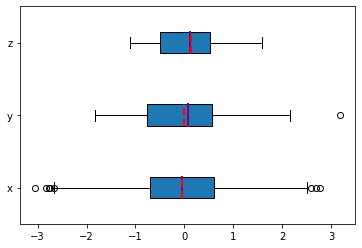

In [148]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
labels=('x', 'y', 'z'), patch_artist=True, medianprops=
{'linewidth':2, 'color':'purple'}, meanprops=
{'linewidth':2, 'color':'red'})
plt.show()

## Histogram

In [149]:
hist, bin_edges= np.histogram(x, bins=10)
hist

array([  9,  20,  70, 146, 217, 239, 160,  86,  38,  15])

In [150]:
bin_edges

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

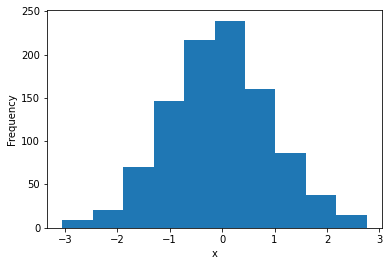

In [151]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

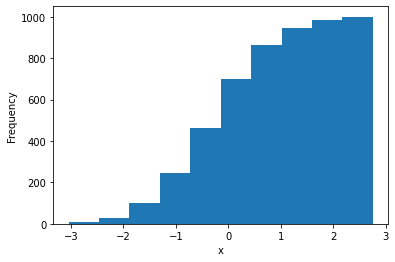

In [152]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

## Pie chart

In [153]:
x, y, z = 128, 256, 1024

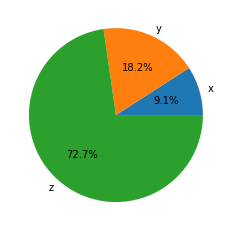

In [155]:
fig, ax = plt.subplots()
ax.pie((x, y, z), labels = ('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

## Bar charts

In [156]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)

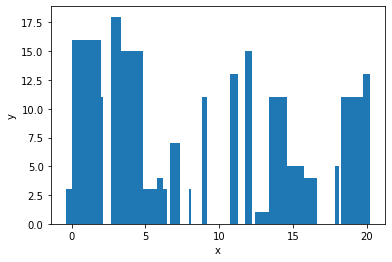

In [160]:
fig, ax = plt.subplots()
ax.bar(x, y, err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## X-Y Plots

In [163]:
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

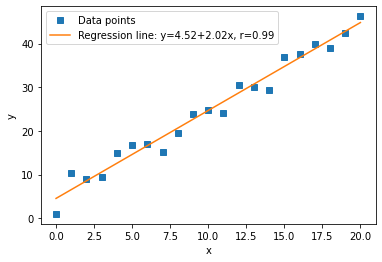

In [164]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

## Heatmaps

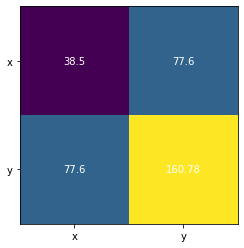

In [167]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

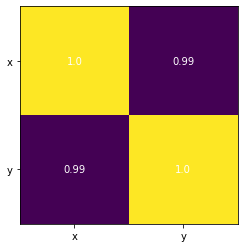

In [168]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()